# HW #3: Unsupervised Learning Practice

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.decomposition import PCA

In [3]:
# read csv
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# scale for kmeans since it is distance sensitive
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(red), columns=red.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


## 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [5]:
np.random.seed(23)
# X.drop('quality', axis=1, inplace=True)
kmeans = KMeans(n_clusters=2)
y_kc_predicted = kmeans.fit_predict(X) # kmeans.labels_
kmeans.cluster_centers_
X_kc = X.copy()
X_kc['kcluster'] = y_kc_predicted
display(X_kc.groupby('kcluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
kcluster,,,,,,,,,,,,
0,-0.509265,0.418390,-0.570319,-0.073051,-0.133948,0.102514,0.142544,-0.224035,0.388743,-0.325572,-0.166682,-0.266533
1,0.889901,-0.731104,0.996589,0.127651,0.234064,-0.179136,-0.249085,0.391484,-0.679299,0.568912,0.291263,0.465746


In [6]:
X_kc_grp = X_kc.groupby('kcluster').count()
X_kc_grp.iloc[:,0]

kcluster
0    1017
1     582
Name: fixed acidity, dtype: int64

### I set n_clusters=2 to identify cluster(s) of observations that have high (quality: 0.47) and low values (quality:-0.27) of the wine quality.
#### For the higher mean value of wine quality (0.47)
- I found out that higher values of wine quality is indicated by positive of 'fixed acidity', 'citric acidity', 'residual sugar', 'chlorides', 'density', 'sulphates', 'alcohol', and 'quality' clusters. 

#### For the lower mean value of wine quality (-0.27)
- On the other hand, lower values of wine quality is indicated by negative of 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', and 'quality' clusters. 

#### From the kmeans cluster analysis, 'fixed acidity', 'voltile acidity', and 'citric acid' varibales are the most important characteristics since the absolute differences are the largest (over 1) in terms of other variables.

## 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

## Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

## If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [7]:
ac = AC(n_clusters=2, 
        affinity='euclidean', 
        linkage='complete')
y_hc_predicted = ac.fit_predict(X)
kmeans.cluster_centers_
X_hc = X.copy()
X_hc['hcluster'] = y_hc_predicted
display(X_hc.groupby('hcluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
hcluster,,,,,,,,,,,,
0,-0.000094,0.000440,-0.003917,-0.000054,-0.013922,-0.000494,-0.000401,-0.000965,0.003336,-0.007182,0.001203,0.001762
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


In [8]:
X_hc_grp = X_hc.groupby('hcluster').count()
X_hc_grp.iloc[:,0]
# X.groupby('hcluster').groups

hcluster
0    1597
1       2
Name: fixed acidity, dtype: int64

In [9]:
print(red.mean())
red.std()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

### I set n_clusters=2 to identify cluster(s) of observations that have high (quality: 0.00) and low values (quality:-1.41) of the wine quality.
#### For the higher mean value of wine quality (0.47)
- I found out that higher values of wine quality is indicated by positive of 'fixed acidity','citric acid', 'residual sugar', 'chlorides', 'free sulful dioxide', 'total sulful dioxide', 'density', 'sulphates', and clusters.

#### For the lower mean value of wine quality (-1.41)
- On the other hand, lower values of wine quality is indicated by negative of volatile acidity', 'pH', 'alcohol', and 'quality' clusters

#### From hierarchical cluster analysis, 'citric acid', 'chlorides', and 'sulphates' variables are the most important characteristics since the absolute differences are large in terms of other variables.

## 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [19]:
pca = PCA()
X_pca = pca.fit_transform(X)
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC6','PC7','PC8','PC9','PC10','PC11'], index=X.index)
np.cumsum(pca.explained_variance_ratio_)

array([0.26670584, 0.47338598, 0.60623802, 0.71875777, 0.78936096,
       0.85085658, 0.90242593, 0.94576205, 0.97698343, 0.99375563,
       1.        , 1.        ])

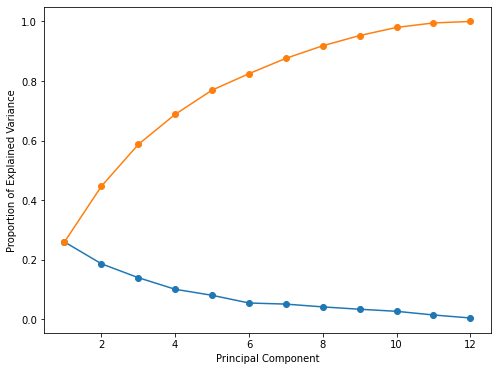

In [87]:
plt.figure(figsize=(8,6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '-o', label='Individual Component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-o', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()

- Around 44.69% of the variantion of data is explained by the frist two components. If I were to use the first two variables to do supervised learning for example to on some other variable tied to wine, for example, predicting the wine price, I will do following steps. First, I would identify the PCA loadings on every variables and find out how much PCA represent on these variables. And then, I would use published literature and domain knowledge to figure out whether these independent variable making sense. After that, I would check the correlationship and reduncancy of variables in case there are bivariate, multivariate, or redundant factors. Then, I would identify a subset of p predicators that are related to the outcome and fit with this subset. Last but not least, I would fit a model with all p predictors, but the estimated coefficients are shrunken towards zero relative to least squares estimates (Lasso algorithm). Base on above situations, I need to adjust the number of variables to make our feature selection with first two components predicting wine price more reasonable.